<a href="https://colab.research.google.com/github/abahrii/Projet/blob/main/POLIST_01_notebookanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de l'analyse exploratoire

## Introduction

Notre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles, et fournir à l'éuipe d'Olist une segmentation des clients pour que utiliser au quotidien par leurs campagnes de communication.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Analyse geographique

In [ ]:
geo_data = pd.read_csv('brazilian_ecommerce/olist_geolocation_dataset.csv')
geo_data.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [ ]:

import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

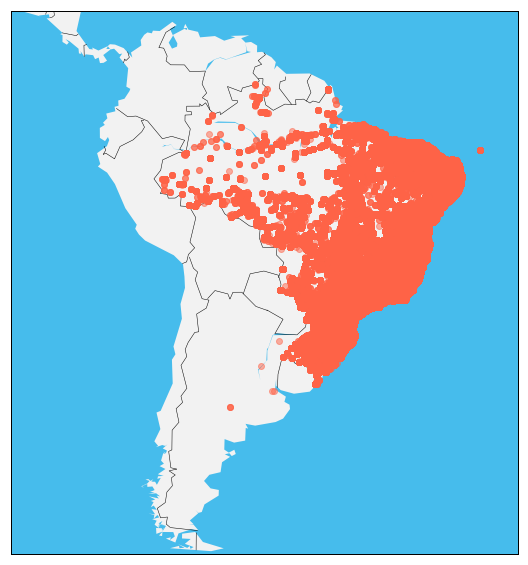

In [ ]:
lat = geo_data['geolocation_lat']
lon = geo_data['geolocation_lng']

plt.figure(figsize=(10,10))

m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
#m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='tomato')

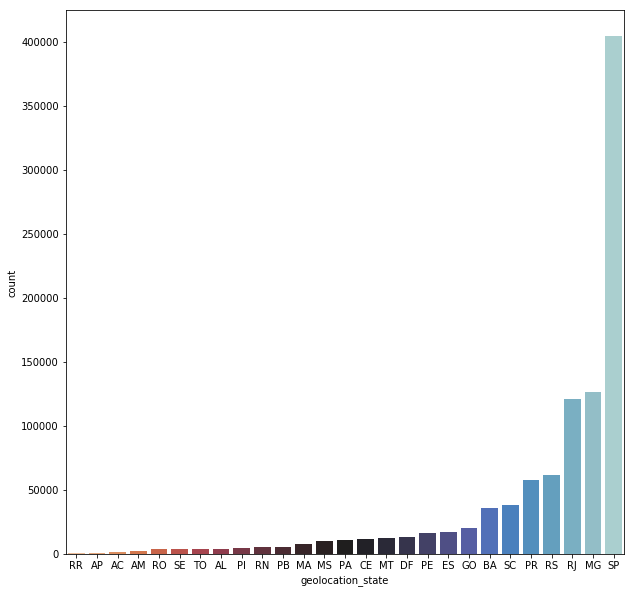

In [ ]:

plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geo_data,
              order=geo_data['geolocation_state'].value_counts().sort_values().index,
              palette='icefire_r')

Le graphique ci-dessus montre le nombre de commandes de produits achetées en fonction des villes de Brazil. Selon cela, São Paulo a le taux le plus élevé et il y a un énorme différence entre le reste des villes.

## Analyse des données

In [ ]:
orders = pd.read_csv('brazilian_ecommerce/olist_orders_dataset.csv')
items = pd.read_csv('brazilian_ecommerce/olist_order_items_dataset.csv')
cust = pd.read_csv('brazilian_ecommerce/olist_customers_dataset.csv')
products = pd.read_csv('brazilian_ecommerce/olist_products_dataset.csv')
sellers = pd.read_csv('brazilian_ecommerce/olist_sellers_dataset.csv')
payment = pd.read_csv('brazilian_ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('brazilian_ecommerce/olist_order_reviews_dataset.csv')

## Product

In [ ]:
total_orders=pd.merge(orders, items)
product_orders=pd.merge(total_orders,products, on="product_id")
product_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 98665
Data columns (total 23 columns):
order_id                         98666 non-null object
customer_id                      98666 non-null object
order_status                     98666 non-null object
order_purchase_timestamp         98666 non-null object
order_approved_at                98652 non-null object
order_delivered_carrier_date     97657 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    98666 non-null object
customer_unique_id               98666 non-null object
order_item_id                    98666 non-null int64
product_id                       98666 non-null object
seller_id                        98666 non-null object
shipping_limit_date              98666 non-null object
price                            98666 non-null float64
freight_value                    98666 non-null float64
product_category_name            97250 non-null object
product_na

In [ ]:
len(product_orders['product_id'].str[-10:].unique())
product_orders['product_id_shorten']=product_orders['product_id'].str[-10:]


Text(0.5, 1.0, 'Top 10 Products')

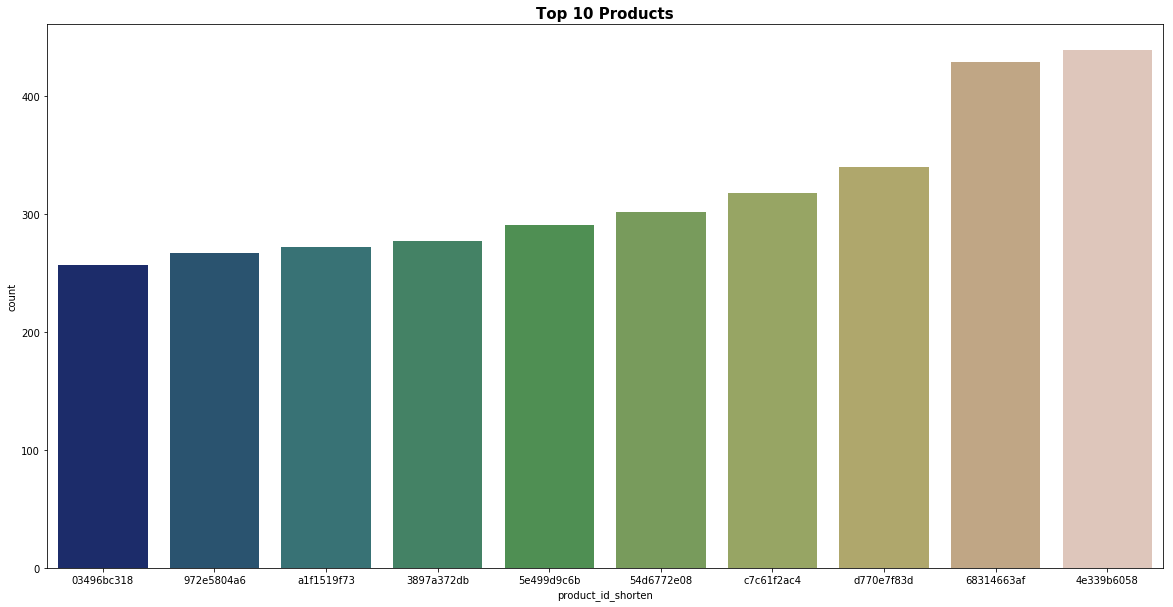

In [ ]:
#Plotting Top 10 Products
plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=product_orders, palette='gist_earth',
             order=product_orders['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

Le graphique ci-dessus montre les 10 meilleurs produits. Les 2 meilleurs produits ont une différence significative par rapport aux autres. En raison des informations sur les données, nous ne pouvons pas dire quels sont ces produits. Mais nous pouvons supposer leur catégorie.

In [ ]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           9311
beleza_saude              8796
esporte_lazer             7681
informatica_acessorios    6660
moveis_decoracao          6355
utilidades_domesticas     5829
relogios_presentes        5601
telefonia                 4182
automotivo                3880
brinquedos                3861
Name: product_id_shorten, dtype: int64

In [ ]:
group_category= product_orders.groupby(['product_id_shorten','product_category_name',])['product_id_shorten']\
                                        .count().sort_values(ascending=False).head(10)
group_category

product_id_shorten  product_category_name 
4e339b6058          cama_mesa_banho           439
68314663af          moveis_decoracao          429
d770e7f83d          ferramentas_jardim        340
c7c61f2ac4          informatica_acessorios    318
54d6772e08          relogios_presentes        302
5e499d9c6b          ferramentas_jardim        291
3897a372db          ferramentas_jardim        277
a1f1519f73          ferramentas_jardim        272
972e5804a6          beleza_saude              267
03496bc318          beleza_saude              257
Name: product_id_shorten, dtype: int64

Les catégories de produits les plus commandé est "cama_mesa_banho" et "moveis_decoracao".

## Seller

In [ ]:
seller_products = pd.merge(product_orders, sellers, on="seller_id")
seller_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 98665
Data columns (total 27 columns):
order_id                         98666 non-null object
customer_id                      98666 non-null object
order_status                     98666 non-null object
order_purchase_timestamp         98666 non-null object
order_approved_at                98652 non-null object
order_delivered_carrier_date     97657 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    98666 non-null object
customer_unique_id               98666 non-null object
order_item_id                    98666 non-null int64
product_id                       98666 non-null object
seller_id                        98666 non-null object
shipping_limit_date              98666 non-null object
price                            98666 non-null float64
freight_value                    98666 non-null float64
product_category_name            97250 non-null object
product_na

In [ ]:
len(seller_products['seller_id'].str[-5:].unique())
seller_products['seller_id_shorten']=seller_products['seller_id'].str[-5:]


Le graphique ci-dessous montre le Top 10 des vendeurs. Les 3 premiers vendeurs ont des proportions proches.

Text(0.5, 1.0, 'Top 10 Seller')

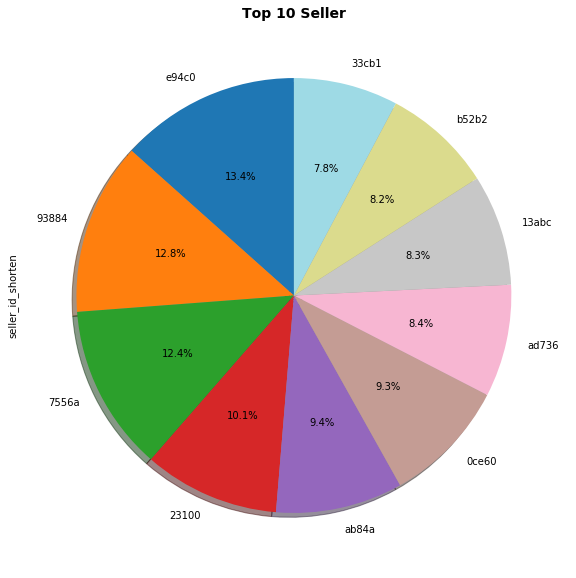

In [ ]:
plt.figure(figsize=(20,10))
seller_products['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

In [ ]:

seller_category= seller_products.groupby(['seller_id_shorten', 'product_category_name'])\
                        ['seller_id_shorten'].count().sort_values(ascending=False).head(10)
seller_category

seller_id_shorten  product_category_name
e94c0              relogios_presentes       1460
93884              cama_mesa_banho          1409
23100              ferramentas_jardim       1362
13abc              telefonia                1112
ab84a              cama_mesa_banho          1059
7556a              beleza_saude             1055
ad736              cool_stuff               1055
b52b2              relogios_presentes        974
010ab              moveis_escritorio         882
5e066              eletronicos               848
Name: seller_id_shorten, dtype: int64

En supposant que pour la catégorie de produit des commandes de ces vendeurs. Le tableau ci-dessous montre la catégorie des 10 meilleurs vendeurs, et comme ils peuvent vendre plusieurs types de produits, les "relogios_presentes" sont le produit le plus vendu du best-seller.

## Payments

In [ ]:
payments=pd.merge(seller_products, payment, on="order_id")
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103056 entries, 0 to 103055
Data columns (total 32 columns):
order_id                         103056 non-null object
customer_id                      103056 non-null object
order_status                     103056 non-null object
order_purchase_timestamp         103056 non-null object
order_approved_at                103042 non-null object
order_delivered_carrier_date     101997 non-null object
order_delivered_customer_date    100754 non-null object
order_estimated_delivery_date    103056 non-null object
customer_unique_id               103056 non-null object
order_item_id                    103056 non-null int64
product_id                       103056 non-null object
seller_id                        103056 non-null object
shipping_limit_date              103056 non-null object
price                            103056 non-null float64
freight_value                    103056 non-null float64
product_category_name            101555 non-null

In [ ]:
payments['days'] = pd.to_datetime(payments['order_purchase_timestamp']).dt.date

In [ ]:
payments['yearly']=pd.to_datetime(payments['order_purchase_timestamp'])\
                    .dt.to_period('M')
payments['yearly']= payments['yearly'].astype(str)
payments = payments.drop('order_purchase_timestamp',axis=1)

In [ ]:
payments= payments.drop(columns=['product_name_lenght','product_description_lenght',
                                 'product_photos_qty','product_weight_g','product_length_cm',
                                 'product_height_cm','product_width_cm'])

In [ ]:
price_details= payments.groupby(['order_id','price','product_category_name',
                                 'days','yearly'])[['freight_value','payment_value']].sum().reset_index()

In [ ]:
price_details

,order_id,price,product_category_name,days,yearly,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff,2017-09-13,2017-09,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop,2017-04-26,2017-04,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,moveis_decoracao,2018-01-14,2018-01,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumaria,2018-08-08,2018-08,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ferramentas_jardim,2017-02-04,2017-02,18.14,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,utilidades_domesticas,2017-05-15,2017-05,12.69,34.59
6,00054e8431b9d7675808bcb819fb4a32,19.90,telefonia,2017-12-10,2017-12,11.85,31.75
7,000576fe39319847cbb9d288c5617fa6,810.00,ferramentas_jardim,2018-07-04,2018-07,70.75,880.75
8,0005a1a1728c9d785b8e2b08b904576c,145.95,beleza_saude,2018-03-19,2018-03,11.65,157.60
9,0005f50442cb953dcd1d21e1fb923495,53.99,livros_tecnicos,2018-07-02,2018-07,11.40,65.39


On peut calculer le 'Total order total' par la somme des prix avec les valeurs de cargaison


In [ ]:
price_details['total_order_value'] = price_details['price'] + price_details['freight_value']

In [ ]:
price_details['gross_profit'] = price_details['payment_value']- price_details['total_order_value']
price_details['profit_margin'] = price_details['gross_profit']/price_details['payment_value']
price_details['profit_margin'] = price_details['profit_margin'].astype('int64')

In [ ]:
price_details

,order_id,price,product_category_name,days,yearly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff,2017-09-13,2017-09,13.29,72.19,72.19,0.000000e+00,0
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop,2017-04-26,2017-04,19.93,259.83,259.83,0.000000e+00,0
2,000229ec398224ef6ca0657da4fc703e,199.00,moveis_decoracao,2018-01-14,2018-01,17.87,216.87,216.87,0.000000e+00,0
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumaria,2018-08-08,2018-08,12.79,25.78,25.78,0.000000e+00,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ferramentas_jardim,2017-02-04,2017-02,18.14,218.04,218.04,-2.842171e-14,0
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,utilidades_domesticas,2017-05-15,2017-05,12.69,34.59,34.59,7.105427e-15,0
6,00054e8431b9d7675808bcb819fb4a32,19.90,telefonia,2017-12-10,2017-12,11.85,31.75,31.75,0.000000e+00,0
7,000576fe39319847cbb9d288c5617fa6,810.00,ferramentas_jardim,2018-07-04,2018-07,70.75,880.75,880.75,0.000000e+00,0
8,0005a1a1728c9d785b8e2b08b904576c,145.95,beleza_saude,2018-03-19,2018-03,11.65,157.60,157.60,0.000000e+00,0
9,0005f50442cb953dcd1d21e1fb923495,53.99,livros_tecnicos,2018-07-02,2018-07,11.40,65.39,65.39,0.000000e+00,0


In [ ]:
price_details.groupby('order_id').count().sort_values(by = 'price',ascending=False).head(10)

,price,product_category_name,days,yearly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
order_id,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1,1,1,1
ab2e3d4093bad08937a1d844c1a60355,1,1,1,1,1,1,1,1,1
ab30f8d4ebb7d33d1dcf54d420ea42cd,1,1,1,1,1,1,1,1,1
ab30f399d360ddf62897051d813f887d,1,1,1,1,1,1,1,1,1
ab30819331b8ee6115370bcfa01a8350,1,1,1,1,1,1,1,1,1
ab3049853be314c3dcc3721cea4438e1,1,1,1,1,1,1,1,1,1
ab2fa8175483622f44ca36cf7f9198b2,1,1,1,1,1,1,1,1,1
ab2f2b70a35105e169d9fba7a65d3ac0,1,1,1,1,1,1,1,1,1
ab2e9e7981f5ff473ba140849d5129c9,1,1,1,1,1,1,1,1,1


In [ ]:
price_details.sort_values('gross_profit', ascending=False).head(10)

,order_id,price,product_category_name,days,yearly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
1432,03caa2c082116e1d31e67e9ae3700499,1680.00,telefonia_fixa,2017-09-29,2017-09,28.01,13664.08,1708.01,11956.07,0
43827,736e1922ae60d0d6a89247b851902527,1790.00,telefonia_fixa,2018-07-15,2018-07,28.72,7274.88,1818.72,5456.16,0
16861,2cc9089445046817a7539d90805e6e5a,989.10,agro_industria_e_comercio,2017-11-24,2017-11,24.49,6081.54,1013.59,5067.95,0
88544,e8fa22c3673b1dd17ea315021b1f0f61,284.99,bebidas,2018-04-19,2018-04,16.87,3018.60,301.86,2716.74,0
54856,912343626f370ead5ef2e85a9d757e22,529.90,sinalizacao_e_seguranca,2018-06-01,2018-06,64.69,3242.84,594.59,2648.25,0
67222,b15c7e972c74684414fb2e659fce916a,1199.00,informatica_acessorios,2017-05-10,2017-05,23.14,3666.42,1222.14,2444.28,0
68554,b4c4b76c642808cbe472a32b86cddc95,2299.95,cool_stuff,2018-07-12,2018-07,104.77,4809.44,2404.72,2404.72,0
78804,cf4659487be50c0c317cff3564c4a840,175.00,sinalizacao_e_seguranca,2018-07-02,2018-07,299.16,2844.96,474.16,2370.80,0
49075,8171523911786efd1d91c66d69051fcd,730.00,pcs,2018-06-11,2018-06,50.68,3122.72,780.68,2342.04,0
80279,d2f270487125ddc41fd134c4003ad1d7,2200.00,relogios_presentes,2018-05-31,2018-05,22.75,4445.50,2222.75,2222.75,0


Text(0.5, 1.0, 'Gross Profit of Top 5 Products (2017-2018)')

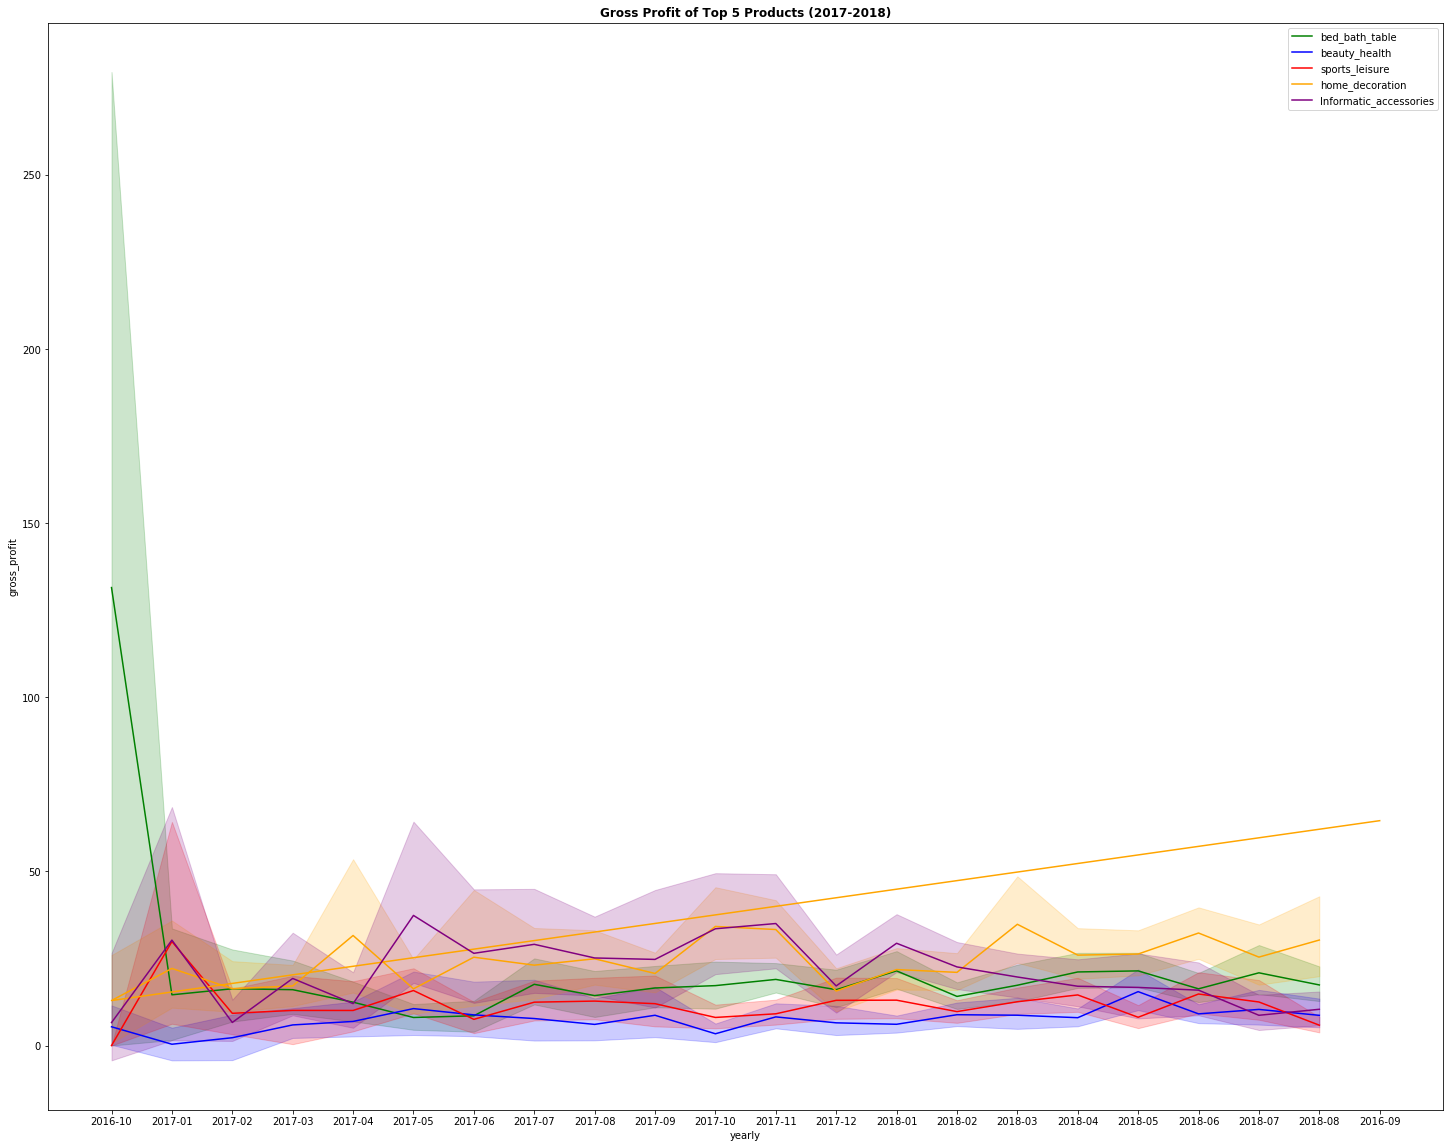

In [ ]:

plt.figure(figsize=(25,20))

sns.lineplot(x='yearly',y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='cama_mesa_banho'], label='bed_bath_table',color="green")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='beleza_saude'], label='beauty_health', color="blue")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='esporte_lazer'], label='sports_leisure', color="red")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='moveis_decoracao'], label='home_decoration', color="orange")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='informatica_acessorios'], label='Informatic_accessories', color="purple")
plt.title("Gross Profit of Top 5 Products (2017-2018)",fontweight='bold')

Le graphique ci-dessus montre la répartition annuelle des 'gross profit' pour les 5 principales catégories de produits commandés et de vendeurs. Selon les données, nous pouvons dire que les accessoires_informatiques ont le 'gross profit' le plus élevé d'avril 2017 à novembre 2017. En revanche, parmi les 3 principaux produits qui sont bed_bath_table, beauty_health et sports_leisure, les 'gross profit' sont inférieurs à 50 unités monétaires

## Reviews

In [ ]:
review=pd.merge(payments, reviews, on="order_id")
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103652 entries, 0 to 103651
Data columns (total 32 columns):
order_id                         103652 non-null object
customer_id                      103652 non-null object
order_status                     103652 non-null object
order_approved_at                103638 non-null object
order_delivered_carrier_date     102586 non-null object
order_delivered_customer_date    101331 non-null object
order_estimated_delivery_date    103652 non-null object
customer_unique_id               103652 non-null object
order_item_id                    103652 non-null int64
product_id                       103652 non-null object
seller_id                        103652 non-null object
shipping_limit_date              103652 non-null object
price                            103652 non-null float64
freight_value                    103652 non-null float64
product_category_name            102140 non-null object
product_id_shorten               103652 non-null

In [ ]:
review['comment_present'] = review.review_comment_message != 'O cliente não comentou'

(<seaborn.axisgrid.FacetGrid at 0x7fd948453f60>, count    103652.000000
 mean          4.087205
 std           1.345213
 min           1.000000
 25%           4.000000
 50%           5.000000
 75%           5.000000
 max           5.000000
 Name: review_score, dtype: float64)

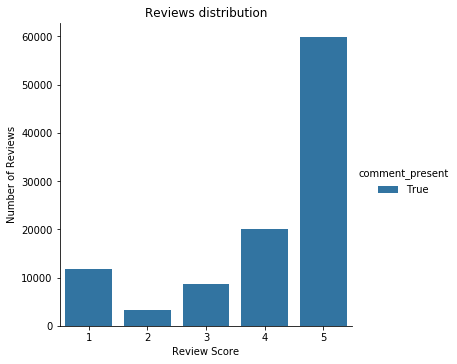

In [ ]:
sns.catplot(x='review_score', kind='count', data=review, hue='comment_present')\
.set(xlabel='Review Score', ylabel='Number of Reviews', title='Reviews distribution'), review.review_score.describe()

La plupart des critiques sont bonnes, nous pouvons voir que le score moyen des critiques est de 4,08, avec un quartile médian à 5. De plus, pour près de la moitié des commandes, Olist n'a reçu aucun retour client. En regardant la différence entre 1 avis de score et 5 avis, nous remarquons que les clients qui ont répondu positivement à l'enquête sont moins susceptibles de laisser des commentaires tandis que les clients qui ont donné de mauvais commentaires sont plus susceptibles de le faire.

## Customer and Order

In [ ]:
cust.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Il y a deux colonnes utilisées pour identifier les clients. customer_id est un identifiant de client généré pour chaque commande. Si le même client passe plusieurs commandes, il a plusieurs identifiants customer_id. Ce que nous voulons utiliser pour cette analyse est customer_unique_id, qui est unique à chaque acheteur et peut être utilisé pour suivre ses achats au fil du temps.

In [ ]:
cust.groupby('customer_unique_id').size().value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
dtype: int64

La majorité des clients n'a effectué qu'un seul achat

In [ ]:
orders = pd.merge(orders,cust[['customer_id','customer_unique_id']],on='customer_id')
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id_x', 'customer_unique_id_y', 'customer_unique_id'],
      dtype='object')

Comme je n'ai besoin que du prix de la commande, je garderai le premier item de chaque commande.


In [ ]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
items.drop_duplicates('order_id',keep='first',inplace=True)

Ensuite, je vais joindre des commandes avec des items pour ajouter des informations sur les prix


In [ ]:
transaction_data = pd.merge(orders,items,'inner','order_id')
transaction_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id_x,customer_unique_id_y,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,af07308b275d755c9edb36a90c618231,af07308b275d755c9edb36a90c618231,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,3a653a41f6f9fc3d2a113cf8398680e8,3a653a41f6f9fc3d2a113cf8398680e8,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,7c142cf63193a1473d2e66489a9ae977,7c142cf63193a1473d2e66489a9ae977,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,72632f0f9dd73dfee390c9b22eb56dd6,72632f0f9dd73dfee390c9b22eb56dd6,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [ ]:
print('Duplicate data entries: {}'.format(transaction_data.duplicated().sum()))
transaction_data.drop_duplicates(inplace = True)

Duplicate data entries: 0


In [ ]:
Moyenne_nulls = transaction_data.isnull().mean(axis=0)
c = []
for i in range(0,len(Moyenne_nulls)):
    if Moyenne_nulls[i] < 0.6:
        templist = list(Moyenne_nulls[Moyenne_nulls==Moyenne_nulls[i]].index)
        for i in range (0,len(templist)):
            c.append(templist[i])
consistants = list(set(c))
data_tr = transaction_data.loc[:,lambda df: consistants]

In [ ]:
data_tr.head()

,customer_unique_id_x,shipping_limit_date,order_purchase_timestamp,price,order_approved_at,product_id,order_status,order_id,order_estimated_delivery_date,freight_value,order_delivered_carrier_date,seller_id,order_delivered_customer_date,order_item_id,customer_unique_id_y,customer_id,customer_unique_id
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-06 11:07:15,2017-10-02 10:56:33,29.99,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,delivered,e481f51cbdc54678b7cc49136f2d6af7,2017-10-18 00:00:00,8.72,2017-10-04 19:55:00,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-10 21:25:13,1,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,af07308b275d755c9edb36a90c618231,2018-07-30 03:24:27,2018-07-24 20:41:37,118.70,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,delivered,53cdb2fc8bc7dce0b6741e2150273451,2018-08-13 00:00:00,22.76,2018-07-26 14:31:00,289cdb325fb7e7f891c38608bf9e0962,2018-08-07 15:27:45,1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-13 08:55:23,2018-08-08 08:38:49,159.90,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,delivered,47770eb9100c2d0c44946d9cf07ec65d,2018-09-04 00:00:00,19.22,2018-08-08 13:50:00,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-17 18:06:29,1,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,7c142cf63193a1473d2e66489a9ae977,2017-11-23 19:45:59,2017-11-18 19:28:06,45.00,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,delivered,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-15 00:00:00,27.20,2017-11-22 13:39:59,66922902710d126a0e7d26b0e3805106,2017-12-02 00:28:42,1,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-19 20:31:37,2018-02-13 21:18:39,19.90,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,delivered,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-26 00:00:00,8.72,2018-02-14 19:46:34,2c9e548be18521d1c43cde1c582c6de8,2018-02-16 18:17:02,1,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


In [ ]:
data_tr.to_csv("cleaned_data_tr.csv")
